Suggested questions:

How many penguins are in the dataset for each species?  
- 152 Adelie, 124 Gentoo, 68 Chinstrap

Do the penguin sizes differ by species, or where they live?
- Gentoo typically largest while Adelie and Chinstrap are relatively similar
- Biscoe ypically has larger penguins while Dream and Torgersen are relatively similar

If we were to build a predictive model for the “sex” of penguins, how might we approach this?
- Changing the label to be 0 or 1 to make classification simpler. In my pair plot I made 0 map to Male which allowed me to see that male penguins are generally larger

If we were to build a predictive model for the “size” of penguins, how might we approach this?
- Define what size is. I decided to use weight for determining size but I believe some combination of the other metrics may make sense. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguins = sns.load_dataset('penguins', cache=True, data_home='dataset')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# how many penguins of each species
# use dictionary for simple look up
speciesCounts = dict(penguins['species'].value_counts())

# individual counts
adeliePopulation = speciesCounts['Adelie']
gentooPopulation = speciesCounts['Gentoo']
chinstrapPopulation = speciesCounts['Chinstrap']

# dataframe to view data
penguins['species'].value_counts().to_frame().reset_index()

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [23]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [ ]:
# Do the penguin sizes differ by species, or where they live?
# separate dataframe by island
adelie = penguins[penguins['island'] == 'Biscoe']
gentoo = penguins[penguins['island'] == 'Dream']
chinstrap = penguins[penguins['island'] == 'Torgersen']

weight = pd.DataFrame(adelie['body_mass_g'].describe())
weight1 = weight.merge(pd.DataFrame(gentoo['body_mass_g'].describe()), left_index=True, right_index=True, suffixes=('(Biscoe)', '(Dream)'))
weight2 = weight.merge(pd.DataFrame(chinstrap['body_mass_g'].describe()), left_index=True, right_index=True, suffixes=('(Biscoe)', '(Torgersen)'))
del weight2['body_mass_g(Biscoe)']

pd.merge(weight1, weight2, left_index=True, right_index=True)

,body_mass_g(Biscoe),body_mass_g(Dream),body_mass_g(Torgersen)
count,167.000000,124.000000,51.000000
mean,4716.017964,3712.903226,3706.372549
std,782.855743,416.644112,445.107940
min,2850.000000,2700.000000,2900.000000
25%,4200.000000,3400.000000,3337.500000
50%,4775.000000,3687.500000,3700.000000
75%,5325.000000,3956.250000,4000.000000
max,6300.000000,4800.000000,4700.000000


In [25]:
# Do the penguin sizes differ by species, or where they live?
# separate dataframe by island
adelie = penguins[penguins['species'] == 'Adelie']
gentoo = penguins[penguins['species'] == 'Gentoo']
chinstrap = penguins[penguins['species'] == 'Chinstrap']

weight = pd.DataFrame(adelie['body_mass_g'].describe())
weight1 = weight.merge(pd.DataFrame(gentoo['body_mass_g'].describe()), left_index=True, right_index=True, suffixes=('(Adelie)', '(Gentoo)'))
weight2 = weight.merge(pd.DataFrame(chinstrap['body_mass_g'].describe()), left_index=True, right_index=True, suffixes=('(Adelie)', '(Chinstrap)'))
del weight2['body_mass_g(Adelie)']

pd.merge(weight1, weight2, left_index=True, right_index=True)

,body_mass_g(Adelie),body_mass_g(Gentoo),body_mass_g(Chinstrap)
count,151.000000,123.000000,68.000000
mean,3700.662252,5076.016260,3733.088235
std,458.566126,504.116237,384.335081
min,2850.000000,3950.000000,2700.000000
25%,3350.000000,4700.000000,3487.500000
50%,3700.000000,5000.000000,3700.000000
75%,4000.000000,5500.000000,3950.000000
max,4775.000000,6300.000000,4800.000000


C:\Users\vDxbs\AppData\Local\Temp\ipykernel_15768\1376920023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_sex['sex'] = penguins_sex['sex'].map({'Male': 0, 'Female': 1})


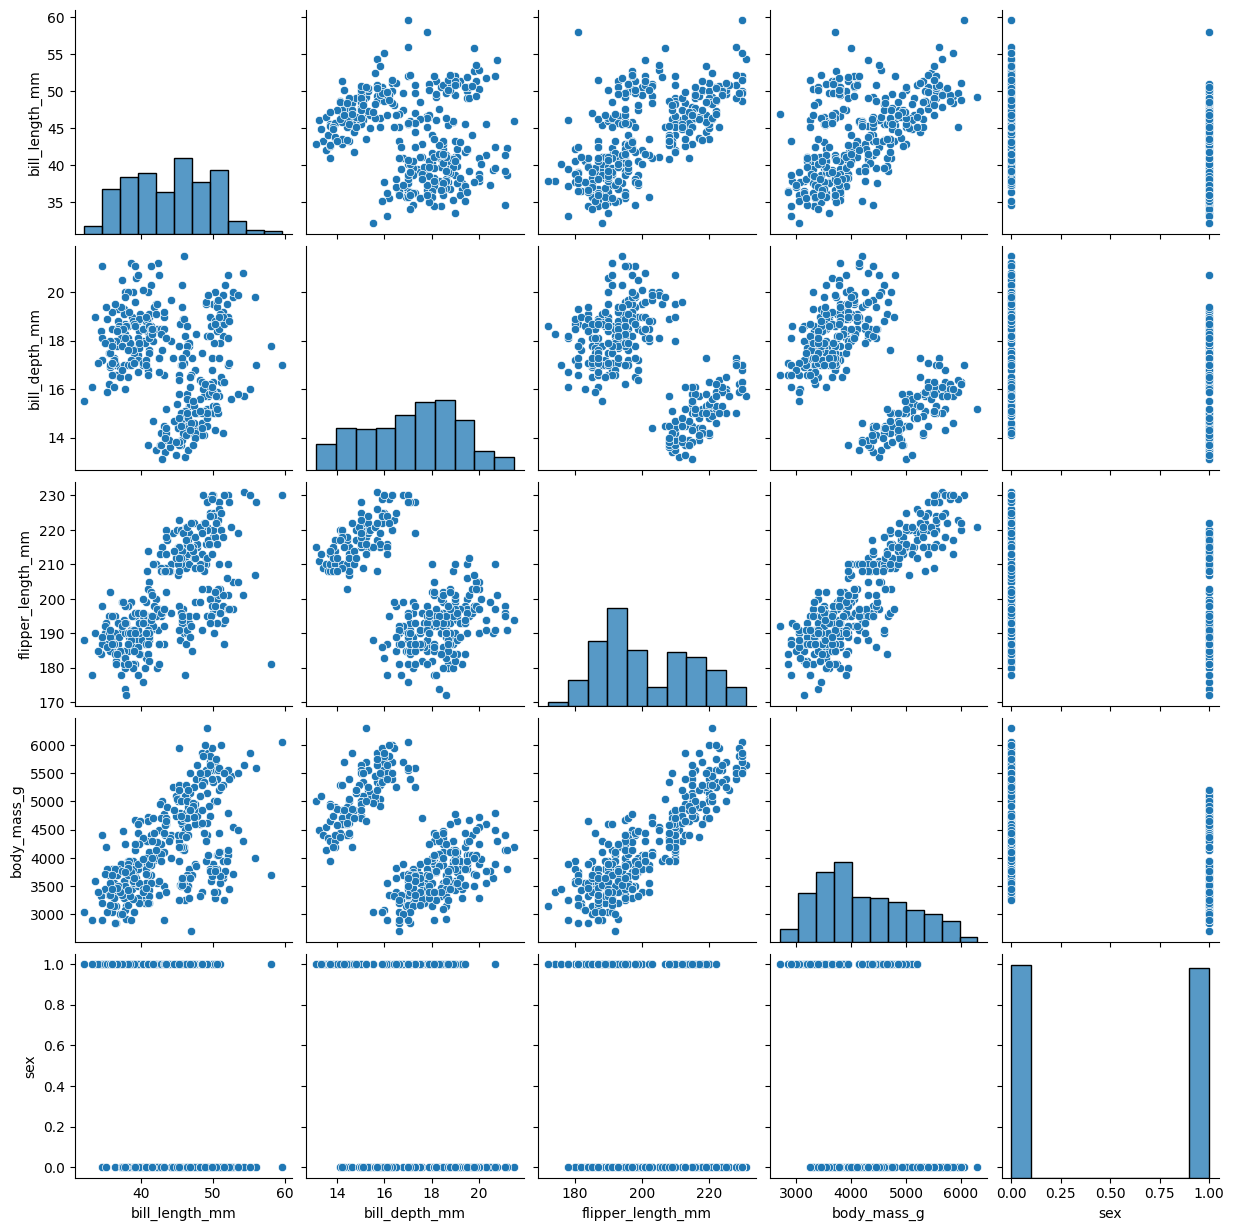

In [31]:
penguins_sex = penguins.dropna()
penguins_sex['sex'] = penguins_sex['sex'].map({'Male': 0, 'Female': 1})
sns.pairplot(penguins_sex)
plt.show()